# Happiness Index 2018-2019 Analysis <a id=top>

Author: Pratik Adhikari

Last Updated: 5/25/2023

**Meta Data** of Happiness Index dataset:

* Overall rank: List of ranks of different countries from 1 to 156
* Country or region: List of the names of different countries.
* Score: List of happiness scores of different countries.
* GDP per capita: The GDP per capita score of different countries (in per thousands).
* Social support: The social support of different countries.
* Healthy life expectancy: The healthy life expectancy of different countries.
* Freedom to make life choices: The score of perception of freedom of different countries.
* Generosity: Generosity (the quality of being kind and generous) score of different countries.
* Perceptions of corruption: The score of the perception of corruption in different countries.

### Table of Contents 

- [Importing required libraries and dataset](#import)
- [Manipulating the Data](#manipulation)
- [Visualizing the Data](#visualization)
    - [Barchart showing the happiness state](#bar)
    - [Boxplot to visualize the statistics of the dataset](#box) 
    - [Top 10 happiest countries](#top10)
        - [Barchart to show top 10 happiest countries](#bar_top10)
        
    - [Correlation](#correlation)
        - [Triangular heatmap showing correlation](#heatmap)
        - [Scatterplot for Score vs GDP per capita](#scatterplot)
        - [Pairplot to show correlation](#pairplot)
        
    - [Visualing in worldmap](#worldmap)
- [Conclusion](#conclusion)

### Importing the dataset <a id=import>
    
    

First, we import the libraries:

*   NumPy - for data manipulation.
*   Pandas - for data manipulation.
*   MatPlotLib - for data visualization.
*   Seaborn - for data visualization.

In [3]:
# importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import country_converter as coco

Now, we read the csv file with the help of pandas into the dataframe.

In [4]:
df = pd.read_csv('C:/Users/Asus/OneDrive/Desktop/datasets/report_2018-2019.csv')
display(df.head())

Overall rank Country or region  Year  Score  GDP per capita  \
0           154       Afghanistan  2019  3.203           0.350   
1           145       Afghanistan  2018  3.632           0.332   
2           107           Albania  2019  4.719           0.947   
3           112           Albania  2018  4.586           0.916   
4            88           Algeria  2019  5.211           1.002   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0           0.517                    0.361                         0.000   
1           0.537                    0.255                         0.085   
2           0.848                    0.874                         0.383   
3           0.817                    0.790                         0.419   
4           1.160                    0.785                         0.086   

   Generosity  Perceptions of corruption  
0       0.158                      0.025  
1       0.191                      0.036  
2       0.178                      0.027  
3       0.149                      0.032  
4       0.073                      0.114

Taking a look at the first 5 rows of the data we see that it contains data for the year 2018 and 2019. 

### Manipulating the data <a id=manipulation>

Since, GPD is in per thousands multiplying it by thousand.

In [5]:
#actual gdp
df['GDP per capita'] = df['GDP per capita'] * 1000 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Year                          312 non-null    int64  
 3   Score                         312 non-null    float64
 4   GDP per capita                312 non-null    float64
 5   Social support                312 non-null    float64
 6   Healthy life expectancy       312 non-null    float64
 7   Freedom to make life choices  312 non-null    float64
 8   Generosity                    312 non-null    float64
 9   Perceptions of corruption     312 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 24.5+ KB


In [7]:
df.describe()

Overall rank         Year       Score  GDP per capita  Social support  \
count    312.000000   312.000000  312.000000      312.000000      312.000000   
mean      78.500000  2018.500000    5.391506      898.298077        1.211026   
std       45.104737     0.500803    1.114631      394.592253        0.300310   
min        1.000000  2018.000000    2.853000        0.000000        0.000000   
25%       39.750000  2018.000000    4.514250      609.500000        1.055750   
50%       78.500000  2018.500000    5.379500      960.000000        1.265500   
75%      117.250000  2019.000000    6.176000     1219.500000        1.457500   
max      156.000000  2019.000000    7.769000     2096.000000        1.644000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               312.000000                    312.000000  312.000000   
mean                  0.661295                      0.423538    0.182926   
std                   0.252724                      0.156024    0.096739   
min                   0.000000                      0.000000    0.000000   
25%                   0.488250                      0.322500    0.108750   
50%                   0.699000                      0.449500    0.175500   
75%                   0.858000                      0.540250    0.245000   
max                   1.141000                      0.724000    0.598000   

       Perceptions of corruption  
count                 312.000000  
mean                    0.111526  
std                     0.095296  
min                     0.000000  
25%                     0.050000  
50%                     0.082000  
75%                     0.141250  
max                     0.457000

Checking if the data contains any NaN values using ***.isna().sum()***

In [8]:
df.isna().sum()

Overall rank                    0
Country or region               0
Year                            0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

Changing the long column names to short ones and making them lowercase for easier indexing.

In [9]:
df.rename(columns={'Country or region':'country'}, inplace=True)
df.columns = df.columns.str.lower()
df.head()


overall rank      country  year  score  gdp per capita  social support  \
0           154  Afghanistan  2019  3.203           350.0           0.517   
1           145  Afghanistan  2018  3.632           332.0           0.537   
2           107      Albania  2019  4.719           947.0           0.848   
3           112      Albania  2018  4.586           916.0           0.817   
4            88      Algeria  2019  5.211          1002.0           1.160   

   healthy life expectancy  freedom to make life choices  generosity  \
0                    0.361                         0.000       0.158   
1                    0.255                         0.085       0.191   
2                    0.874                         0.383       0.178   
3                    0.790                         0.419       0.149   
4                    0.785                         0.086       0.073   

   perceptions of corruption  
0                      0.025  
1                      0.036  
2                      0.027  
3                      0.032  
4                      0.114

To find, how many unique countries are there.

In [10]:
df.country.nunique()

160

Creating a function that makes it easier for us to find the average of each year.

In [11]:
#function to find average happiness for each year passed
def average_happiness(year):
    threshold = df[df['year']==year].score.sum() / len(df[df['year'] == year])
    return threshold

Using the function to view the average happiness index for 2018 and 2019.
Here we use ***.display()*** to view all the results ***(it only prints the last code by default)***

In [12]:
average_2018 = average_happiness(2018)
display(average_2018)
average_2019 = average_happiness(2019)
display(average_2019)



5.375916666666667

5.407096153846155

In [13]:
total_average = (average_2018 + average_2019) / 2

In [14]:
df['happiness_state'] = ['Above average' if i > total_average else 'Below average' for i in df.score]
df

overall rank      country  year  score  gdp per capita  social support  \
0             154  Afghanistan  2019  3.203           350.0           0.517   
1             145  Afghanistan  2018  3.632           332.0           0.537   
2             107      Albania  2019  4.719           947.0           0.848   
3             112      Albania  2018  4.586           916.0           0.817   
4              88      Algeria  2019  5.211          1002.0           1.160   
..            ...          ...   ...    ...             ...             ...   
307           152        Yemen  2018  3.355           442.0           1.073   
308           138       Zambia  2019  4.107           578.0           1.058   
309           125       Zambia  2018  4.377           562.0           1.047   
310           146     Zimbabwe  2019  3.663           366.0           1.114   
311           144     Zimbabwe  2018  3.692           357.0           1.094   

     healthy life expectancy  freedom to make life choices  generosity  \
0                      0.361                         0.000       0.158   
1                      0.255                         0.085       0.191   
2                      0.874                         0.383       0.178   
3                      0.790                         0.419       0.149   
4                      0.785                         0.086       0.073   
..                       ...                           ...         ...   
307                    0.343                         0.244       0.083   
308                    0.426                         0.431       0.247   
309                    0.295                         0.503       0.221   
310                    0.433                         0.361       0.151   
311                    0.248                         0.406       0.132   

     perceptions of corruption happiness_state  
0                        0.025   Below average  
1                        0.036   Below average  
2                        0.027   Below average  
3                        0.032   Below average  
4                        0.114   Below average  
..                         ...             ...  
307                      0.064   Below average  
308                      0.087   Below average  
309                      0.082   Below average  
310                      0.089   Below average  
311                      0.099   Below average  

[312 rows x 11 columns]

Creating separate dataframe for 2018 and 2019


In [15]:
#substituting the dataframe
df_2019 = df[df.year == 2019]
df_2018 = df[df.year == 2018]

### Visualizing the Data <a id=visualization>

#### Barchart showing the happiness state <a id=bar>

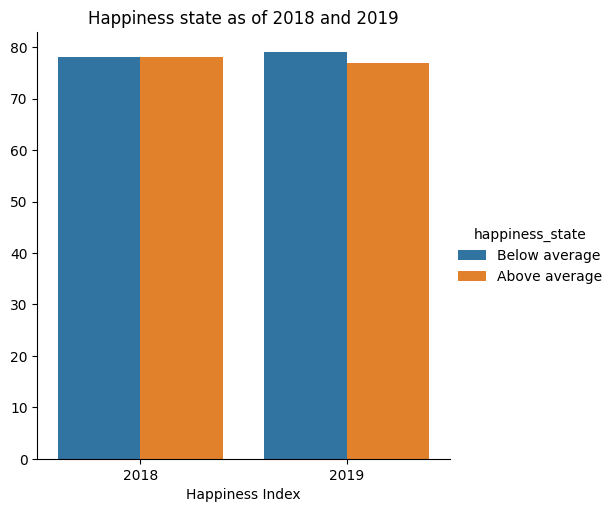

In [16]:
#using seaborn and matplotlib to create a visualization
sns.catplot(kind='count', x='year', hue='happiness_state', data=df)
plt.xlabel('Happiness Index')
plt.title('Happiness state as of 2018 and 2019')
plt.ylabel('')
plt.show()


There were almost equal countries that were above and below the average value of happiness index in 2018 whereas more countries were below average in 2019.



In [17]:
state = df_2019['happiness_state'].value_counts()
state

Below average    79
Above average    77
Name: happiness_state, dtype: int64

#### Boxplot to visualize the statistics of the dataset <a id=box>

In [18]:
df.columns
cols_used = ['score',
       'social support', 'healthy life expectancy',
       'freedom to make life choices', 'generosity',
       'perceptions of corruption']

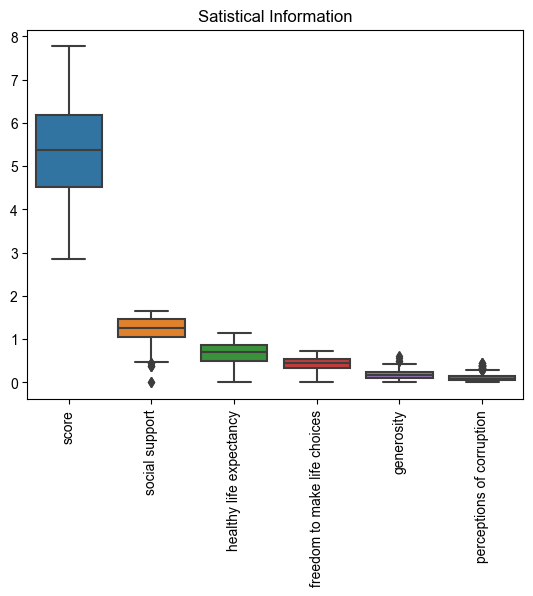

In [19]:
fig, ax1 = plt.subplots()
sns.set_style('darkgrid')
sns.boxplot(data=df[cols_used], ax=ax1)
plt.xticks(rotation = 90)
ax1.set(title='Satistical Information')
plt.show()


### Top 10 happiest countries <a id=top10>

In [20]:
#function to define the top 10 countries for the year passed
def top_10_happiest(year):
    happiest = df[df['year']==year].groupby("country").agg(score=('score','mean')).sort_values('score', ascending=False)
    return happiest[:10]


#### Barchart to show the Top 10 Happiest Counries <a id=bar_top10>

In [21]:
happiest_2018 = top_10_happiest(2018)
happiest_2019 = top_10_happiest(2019)

#defing function to print the graph
def top_10_plot(df,palette, title):

    fig, ax2 = plt.subplots(figsize=(8,6))

    sns.barplot(x='score', y=df.index, data=df, palette=palette, ax=ax2)
    for i,j in enumerate(happiest_2018.values):
        ax2.text(j + .2, i , f"{round(j[0], 2)}")
    ax2.set(xlabel='Score', ylabel='Country', title=title)
    plt.show()

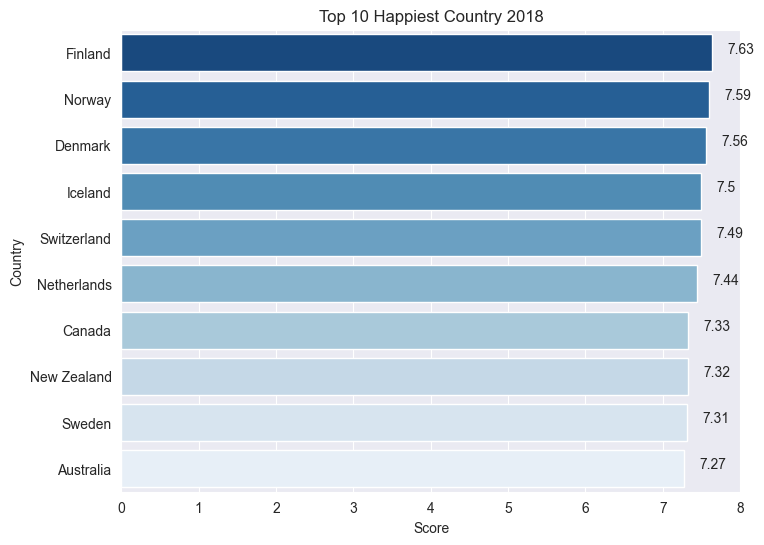

In [22]:
#plotting the graph using the function
top_10_plot(happiest_2018, 'Blues_r', 'Top 10 Happiest Country 2018')

Finland is the most happiest country of 2018 with happiness index of ***7.63*** followed by Norway, Denmark.

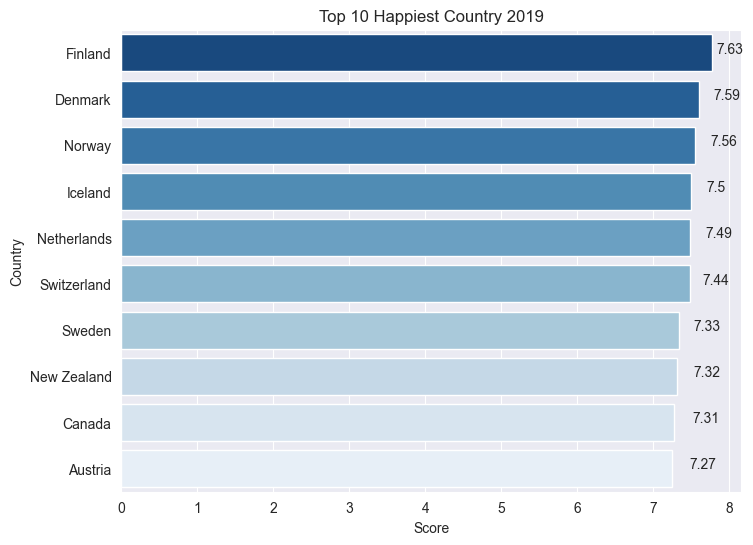

In [23]:
top_10_plot(happiest_2019, 'Blues_r', 'Top 10 Happiest Country 2019')

In 2019, Finland still manages to keep its top position with similar happiness index ***7.63*** followed by Denmark and Norway.

Finland was top in both the years, also we can see that there are same countries in the top 10 only their positions seemed to have been interchanged.


### Correlation <a id=correlation>

#### Triangular heatmap showing the correlation <a id=heatmap>

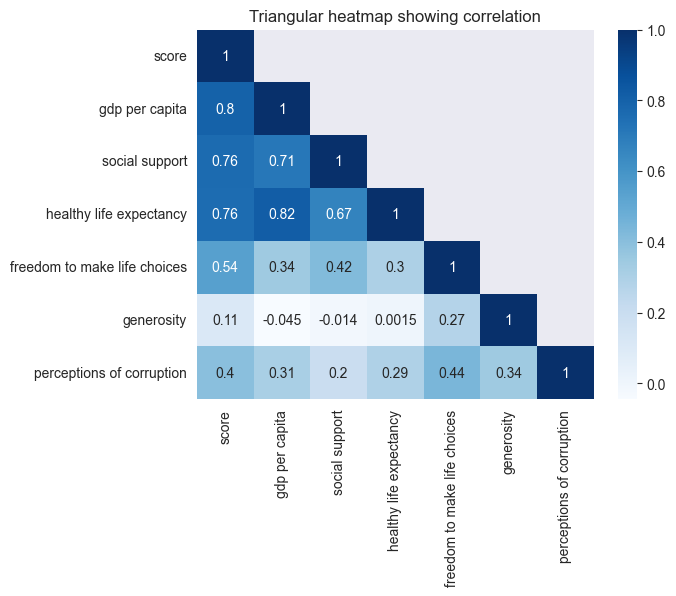

In [24]:
columns_req = ['score', 'gdp per capita',
       'social support', 'healthy life expectancy',
       'freedom to make life choices', 'generosity',
       'perceptions of corruption']
corr = df[columns_req].corr()
similar = np.ones_like(corr, dtype=np.bool_)
triangle = np.triu(similar, 1)
sns.heatmap(corr, mask=triangle, annot=True, cmap='Blues')
plt.title('Triangular heatmap showing correlation')
plt.show()


The correalation heatmap shows that all the factors seems to have been associated with the happiness index except for generosity as it has very low correlation. The **GDP per Capita*** is seems to have the highest positive correlation with the happiness score.

#### Scatterplot to view the correlation <a id=scatterplot>

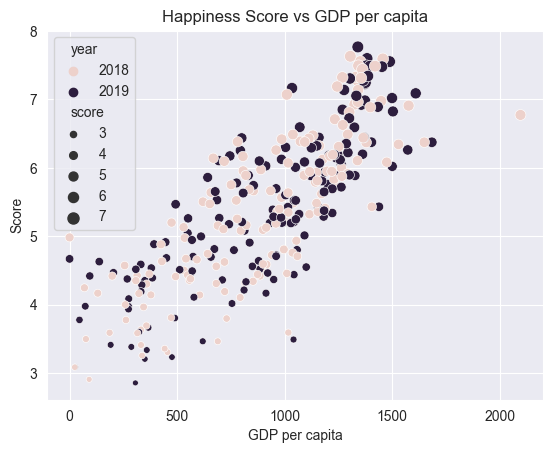

In [25]:
fig, ax2 = plt.subplots()
sns.scatterplot(x='gdp per capita', y='score', data=df, hue='year', size='score', ax=ax2)
ax2.set(xlabel='GDP per capita', ylabel='Score', title='Happiness Score vs GDP per capita')
plt.show()

We can see that ***Happiness score*** and ***GDP per capita*** seems to have high positive correlation as seen in the heatmap.
We can infer that higher GDP per capita associates with high happiness index of the country.

#### Pairplot to view the overall dependencies <a id=pairplot>

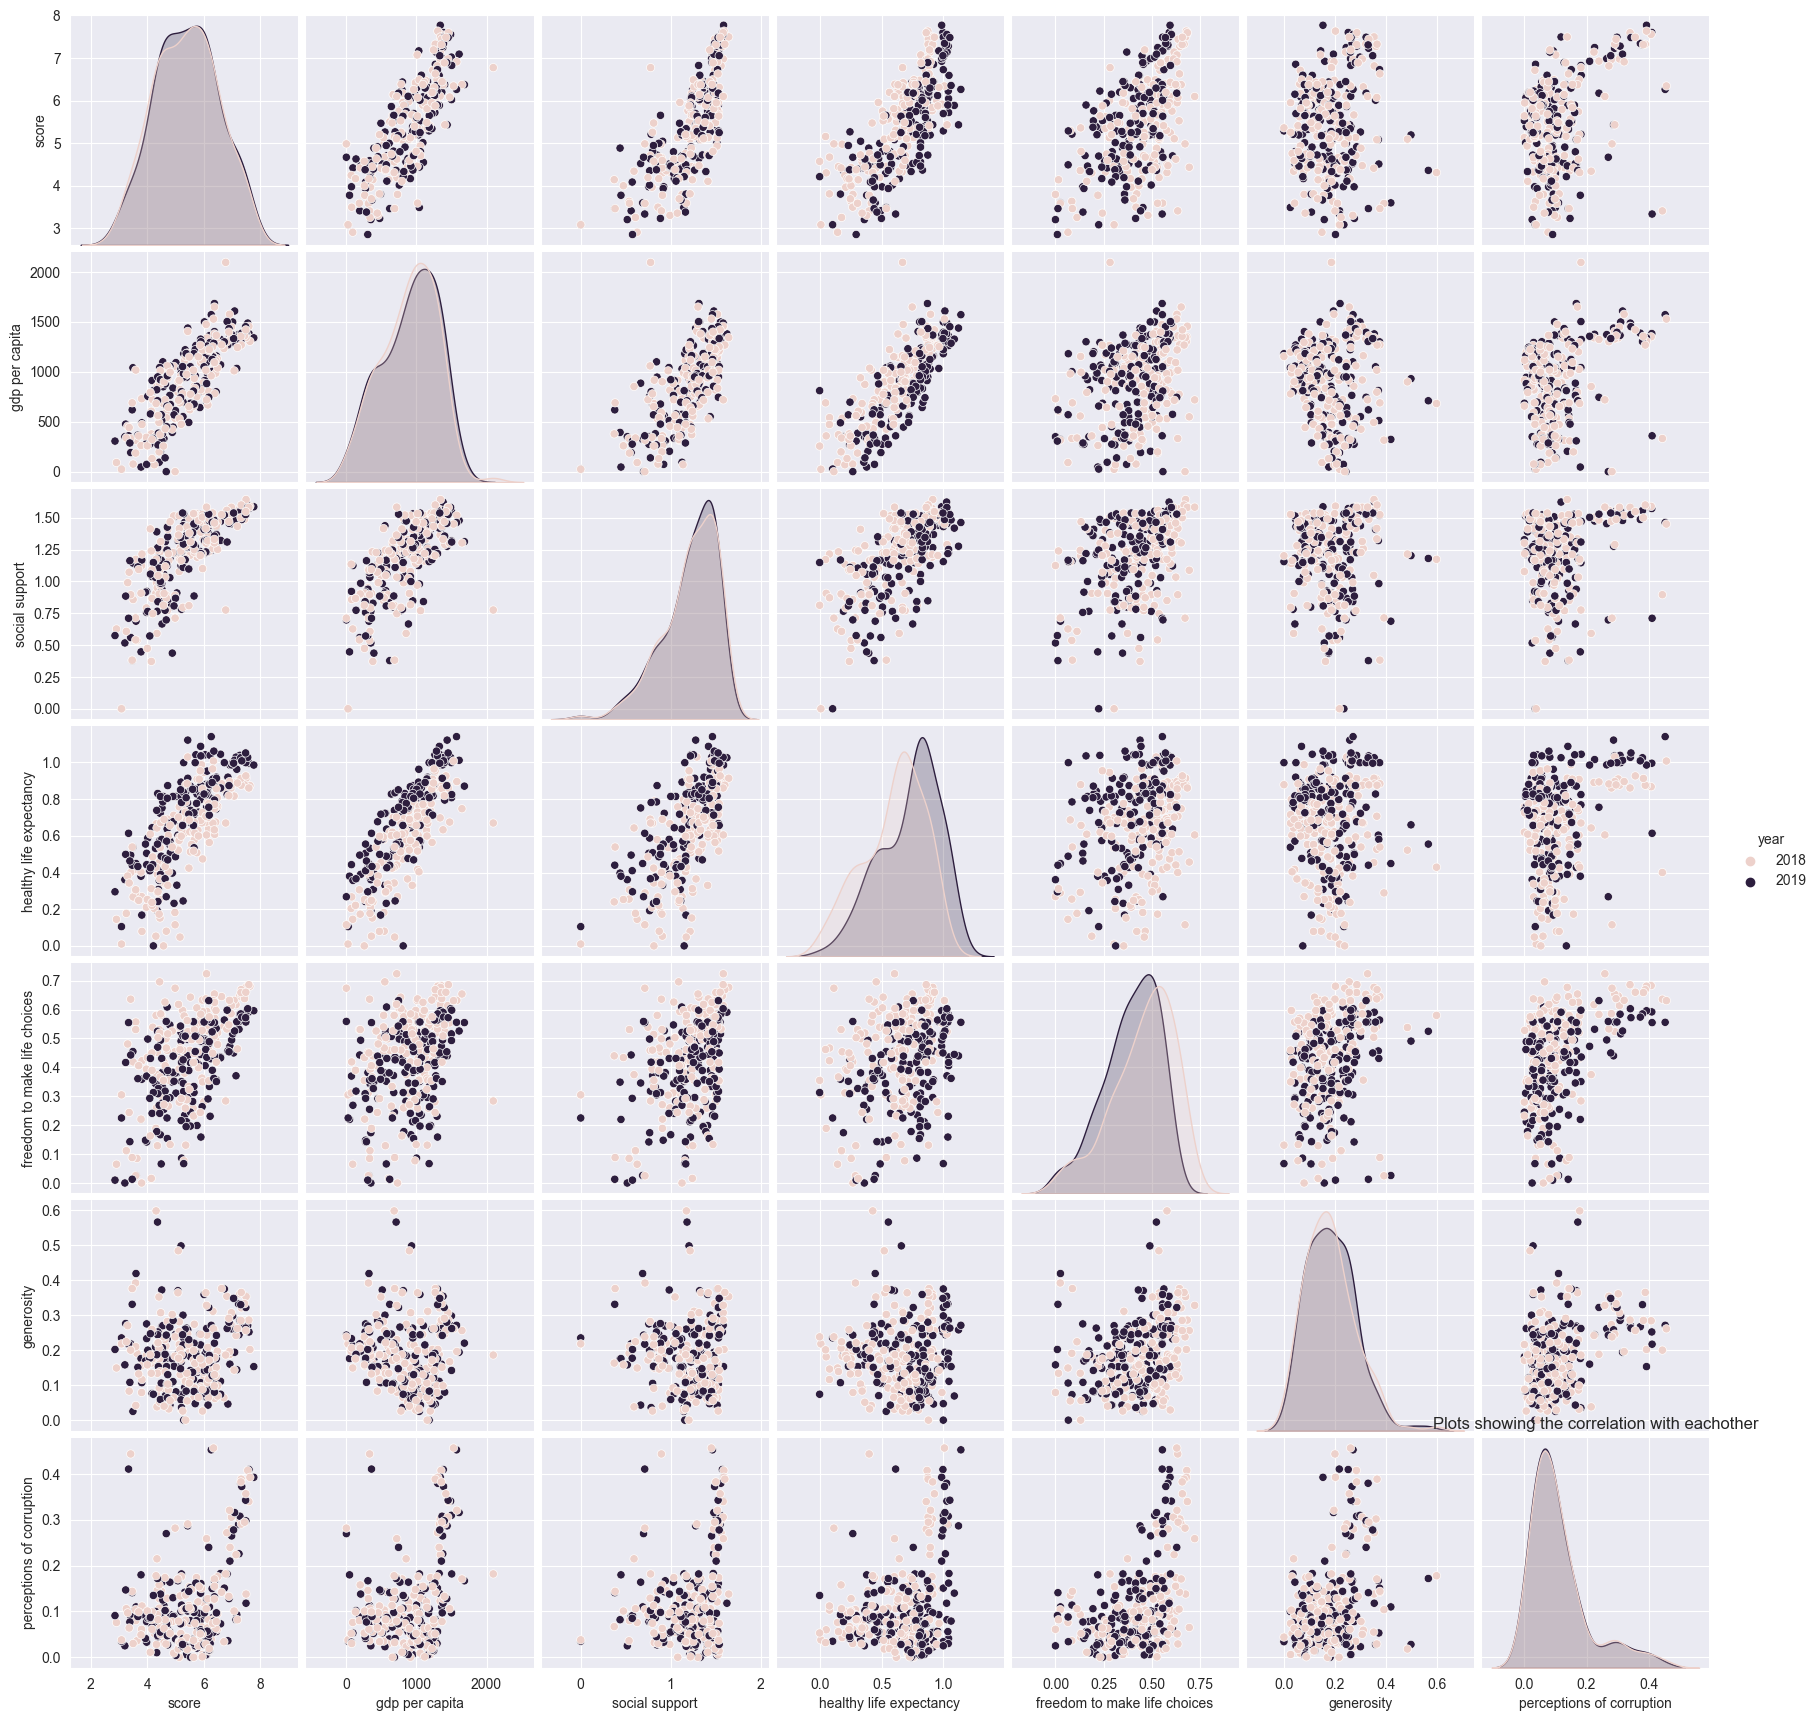

In [26]:
#using seaborn to create a pairplot
sns.pairplot(vars=columns_req, data=df, hue='year', diag_kind='kde', kind='scatter')
plt.title('Plots showing the correlation with eachother')
plt.show()

We can see a clear graph for every factor with each other and check if they associate with eachother or not.
The color has been changed according to the year.

Grouping the df according to ***country*** to find the ***score*** and ***gdp***.

Here, I have used ***country_converter*** to convert the country names into ISO3 format that is recognizable by the ***pyplot***.

In [27]:
new_df = df[df['year']==2019].groupby('country').agg(score=('score', 'mean'), gdp=('gdp per capita', 'mean')).reset_index()
new_df['country'] = coco.convert(names=new_df['country'], to='ISO3')
new_df.head()

country  score     gdp
0     AFG  3.203   350.0
1     ALB  4.719   947.0
2     DZA  5.211  1002.0
3     ARG  6.086  1092.0
4     ARM  4.559   850.0

### Visualizing in world map <a id=worldmap>

In [28]:
#creating a function to plot the world map easily
def create_worldmap(data, color, title, sphere=False):
    figure = px.choropleth(data, locations='country', color=color, hover_name=df_2019.country)
    if sphere:
        figure.update_geos(projection_type ='orthographic')
    else:
        figure.update_geos(projection_type='natural earth')
    figure.update_layout(title=title)
    figure.show()



Have fun, viewing the happiness score and gdp of all the countries in the following real world like visualization ;)

In [29]:
create_worldmap(data=new_df, title='Happiness Index Around the Globe', color='score', sphere=True )

In [30]:
create_worldmap(data=new_df, color='gdp', title='GDP per capita Around The World')

### Conclusion <a id=conclusion>

From the above data manipulation and visualization we can conclude that the average happiness index has increased form 2018 to 2019 but there are more countries below average score in 2019. It is like ***"The rich are getting richer and the poor are getting poorer"***. 

We saw that the happiness score is associated with other factors like ***'gdp per capita','social support', 'healthy life expectancy', 'freedom to make life choices', 'generosity','perceptions of corruption'***. Change in these factors cause the increase or decrease in the overall happiness index. 

**Finland** is the country with highest happiness index as of both the years.

Thus, the people in this modern world who earn sufficient and have the freedom to make choices should abide by the law and order of the government, provide support to their family to have sound health and live happy life.

- [Back to Top](#top)